In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [5]:
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry')
    
plt.rcParams['axes.unicode_minus'] = False

In [8]:
pinkwink_web = pd.read_csv('../data/08. PinkWink Web Traffic.csv', encoding='utf-8', thousands=',', names=['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766
16. 7. 2.,377
16. 7. 3.,427
16. 7. 4.,902
16. 7. 5.,850


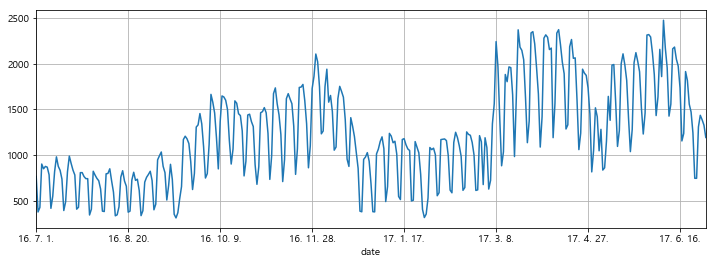

In [9]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

In [10]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [11]:
def error(f,x,y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [14]:
f1p = np.polyfit(time, traffic, 1)
f1 = np.poly1d(f1p)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.62841018946943
429.5328046676293
330.4777304274343


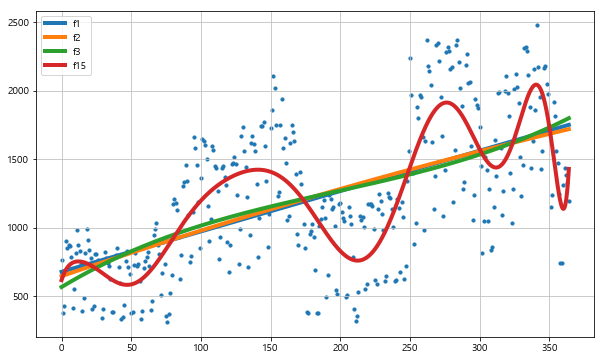

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)
plt.show()

In [17]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

In [18]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [19]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,911.790860,709.280069,1116.533983
421,2017-08-26,496.917939,297.167706,718.290770
422,2017-08-27,629.458439,427.286964,854.388573
423,2017-08-28,1181.938386,969.827786,1394.362759
424,2017-08-29,1217.864960,1006.679747,1425.704954


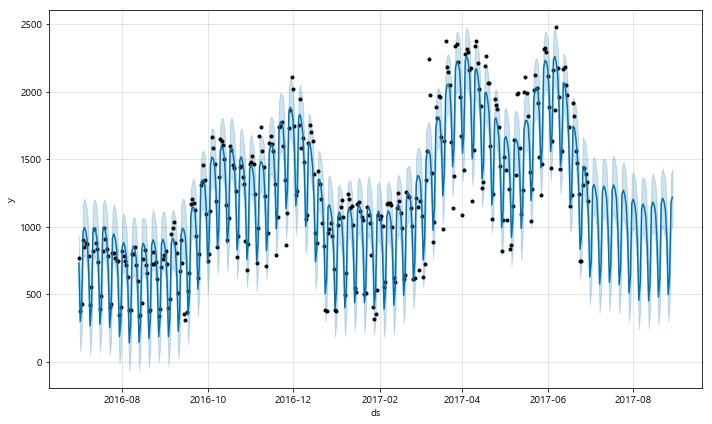

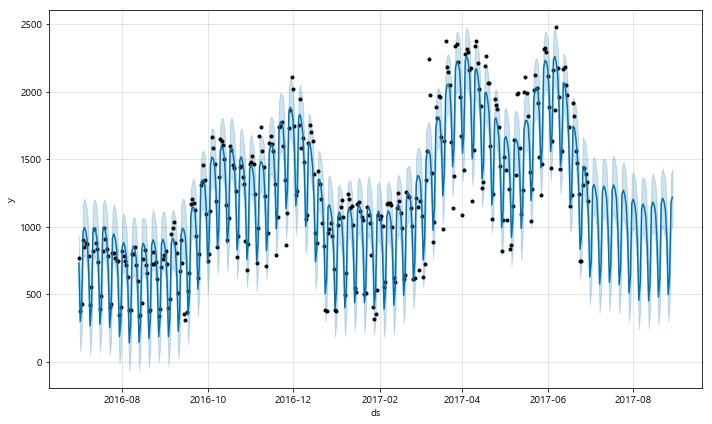

In [20]:
m.plot(forecast)

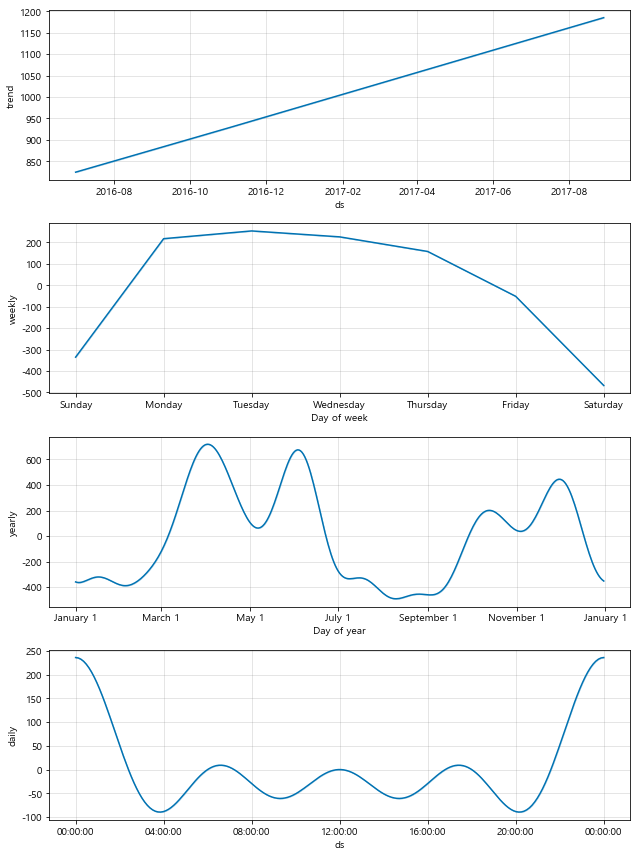

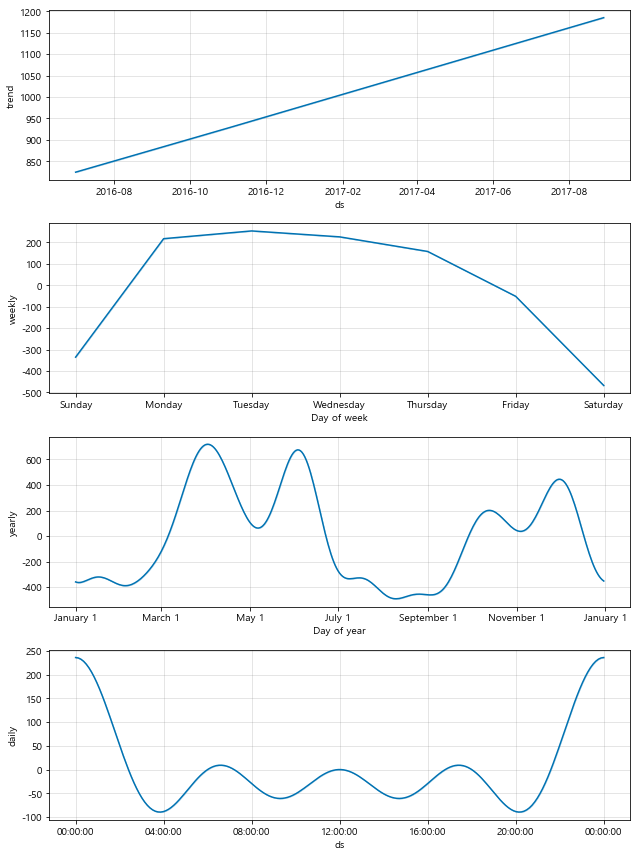

In [21]:
m.plot_components(forecast)

In [27]:
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

start_date = '2010-03-01' 
end_date = '2019-01-01' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)

KIA.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,22050.0,22300.0,21800.0,21850.0,18562.01,3935516
2010-03-03,22100.0,22450.0,21850.0,22400.0,19029.24,4380617
2010-03-04,22400.0,22600.0,22300.0,22500.0,19114.19,2490087
2010-03-05,22500.0,22750.0,22350.0,22750.0,19326.58,2379282
2010-03-08,23050.0,23100.0,22500.0,22800.0,19369.05,4326618


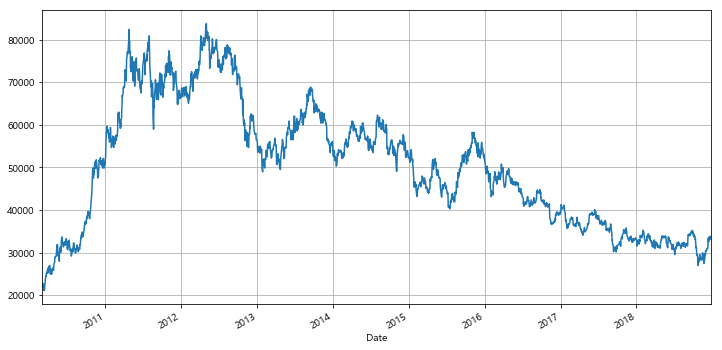

In [28]:
KIA['Close'].plot(figsize=(12,6), grid=True)

In [29]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,22050.0,22300.0,21800.0,21850.0,18562.01,3935516
2010-03-03,22100.0,22450.0,21850.0,22400.0,19029.24,4380617
2010-03-04,22400.0,22600.0,22300.0,22500.0,19114.19,2490087
2010-03-05,22500.0,22750.0,22350.0,22750.0,19326.58,2379282
2010-03-08,23050.0,23100.0,22500.0,22800.0,19369.05,4326618
2010-03-09,22550.0,22650.0,22050.0,22050.0,18731.91,4707240
2010-03-10,22200.0,22250.0,21750.0,22200.0,18859.34,4146645
2010-03-11,22200.0,22350.0,21750.0,21800.0,18519.53,3833839
2010-03-12,21800.0,21900.0,21100.0,21100.0,17924.87,6123788


In [30]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2010-03-02,21850.0
1,2010-03-03,22400.0
2,2010-03-04,22500.0
3,2010-03-05,22750.0
4,2010-03-08,22800.0


In [32]:
m = Prophet(daily_seasonality=True)
m.fit(df)

In [35]:
future = m.make_future_dataframe(periods=730)
future.tail()

,ds
2420,2018-12-25
2421,2018-12-26
2422,2018-12-27
2423,2018-12-28
2424,2018-12-29


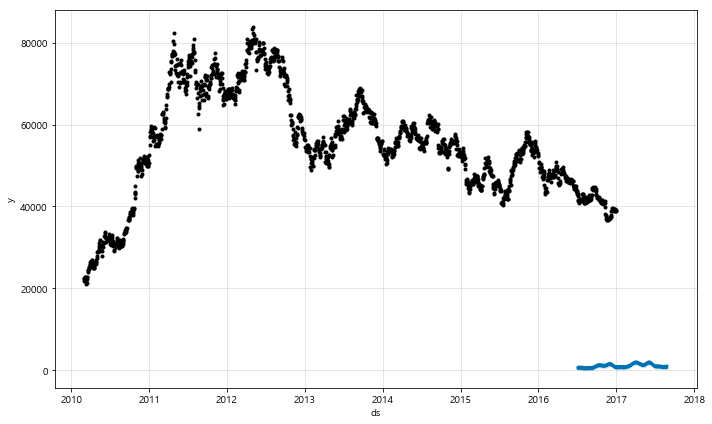

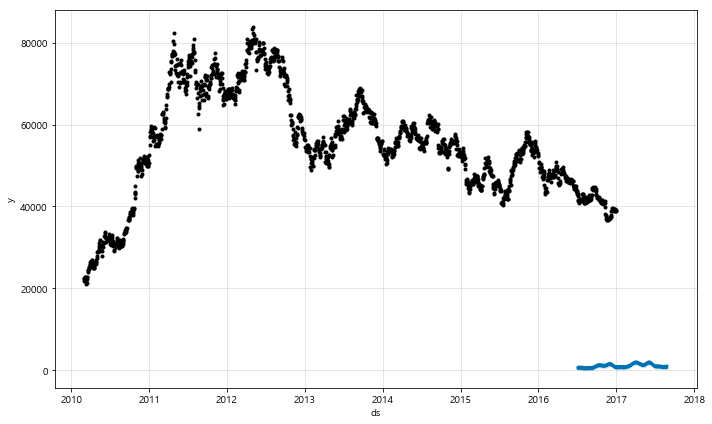

In [38]:
m.plot(forecast)

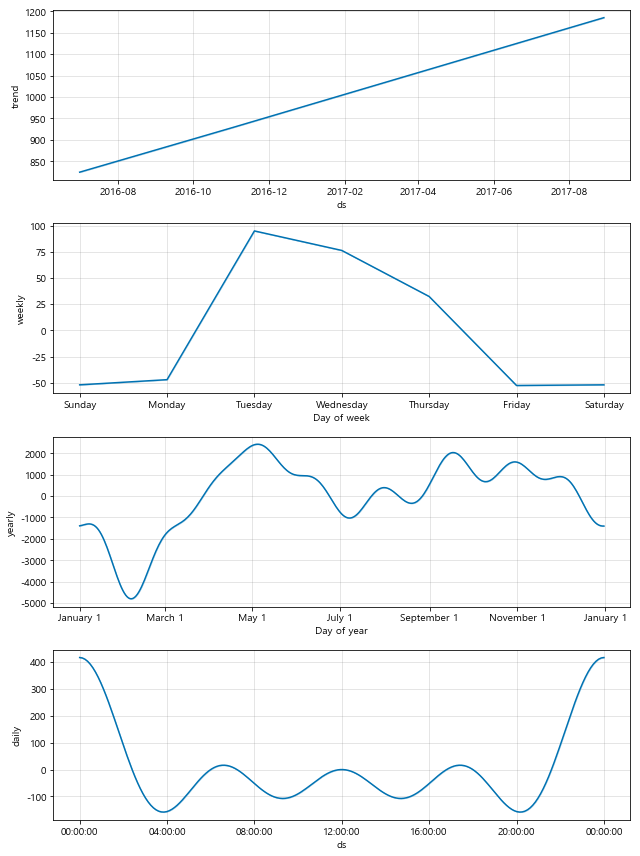

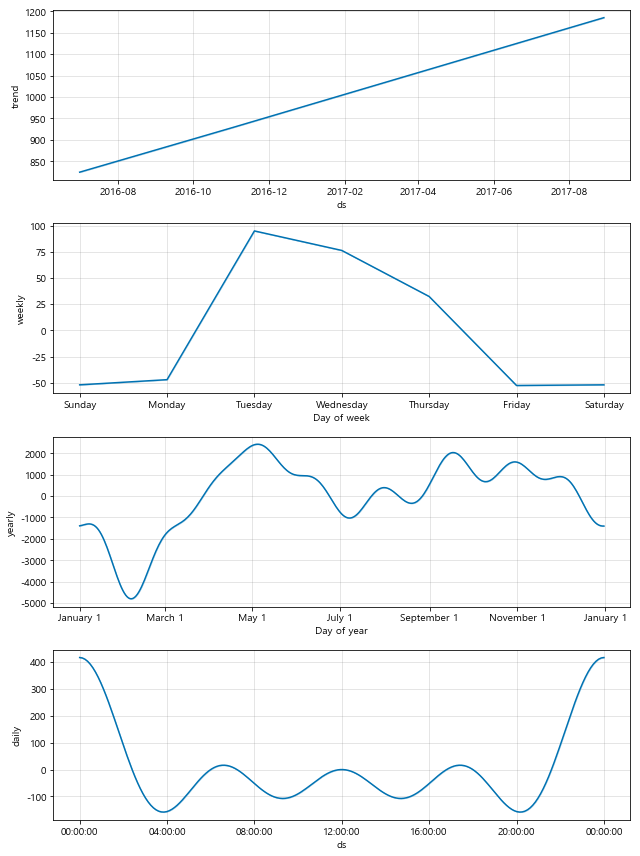

In [39]:
m.plot_components(forecast)

[*********************100%***********************]  1 of 1 downloaded


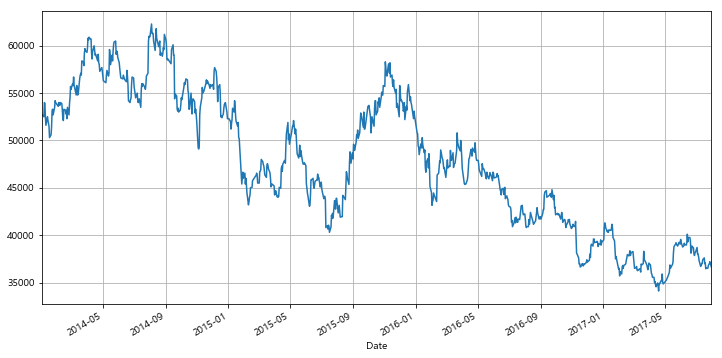

In [41]:
start_date = '2014-01-01' 
end_date = '2017-07-31' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True)

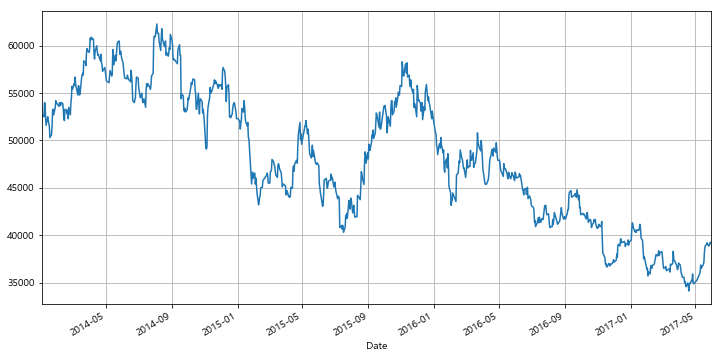

In [42]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True)

In [43]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [45]:
m = Prophet(daily_seasonality=True)
m.fit(df)

In [47]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


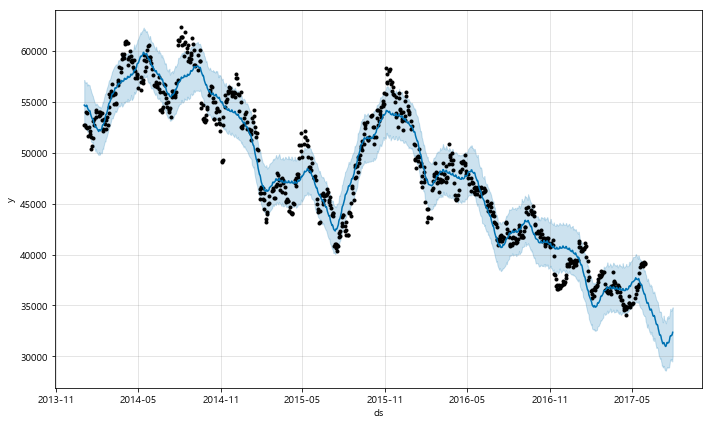

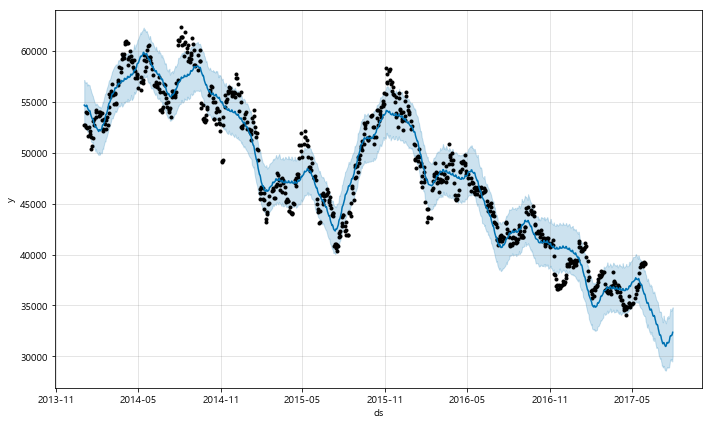

In [48]:
forecast = m.predict(future)
m.plot(forecast)

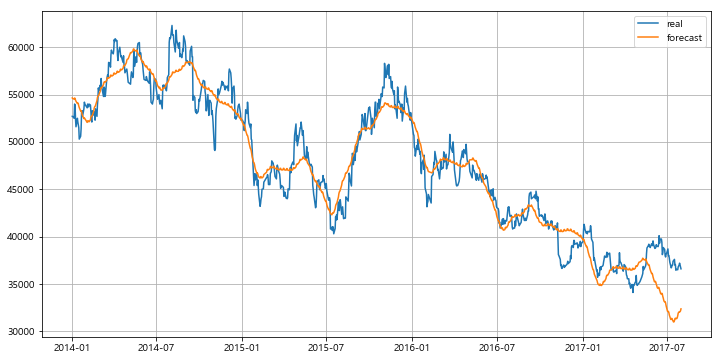

In [49]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()